In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bandit(action):
    m = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.7, 0.45, 0.55] # Mean rewards
    return m[action - 1] + np.random.randn()

def binary_bandit_a(action):
    p = [0.1, 0.2]
    if np.random.rand() < p[action - 1]:
        return 1
    else:
        return 0

def binary_bandit_b(action):
    p = [0.8, 0.9]
    if np.random.rand() < p[action - 1]:
        return 1
    else:
        return 0

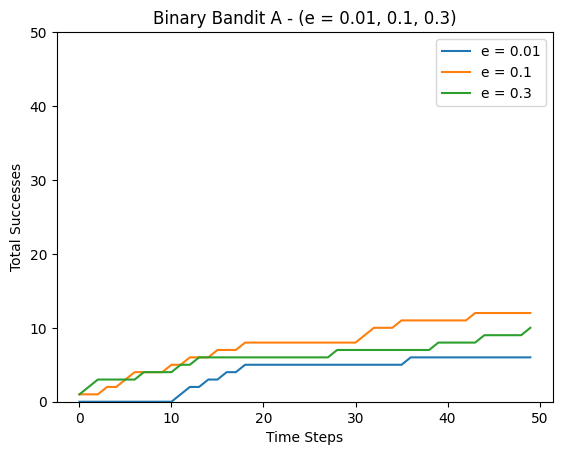

In [3]:
steps = 50
rewards = np.zeros((steps, 2, 3))
i = 0
total_value = np.zeros((steps, 3))

for e in [0.01, 0.1, 0.3]:
    rewards[:, :, i] = 0
    step = 0
    
    while step < steps:
        # exploration
        if np.random.rand() < e or step == 0:
            action = np.random.randint(2) + 1
            value = binary_bandit_a(action)
            total_value[step, i] = value
            if step > 0:
                total_value[step, i] += total_value[step - 1, i]
            rewards[step, :, i] = [value, action]
        else:
            # exploitation
            a1 = np.sum(rewards[:step, 0, i] == 1) if np.sum(rewards[:step, 1, i] == 1) else 0
            a2 = np.sum(rewards[:step, 0, i] == 1) if np.sum(rewards[:step, 1, i] == 2) else 0
            
            action = 1 if a2 > a1 else 2
            
            value = binary_bandit_a(action)
            total_value[step, i] = value + total_value[step - 1, i]
            rewards[step, :, i] = [value, action]
        
        step += 1
    
    i += 1


plt.plot(total_value[:, 0])
plt.plot(total_value[:, 1])
plt.plot(total_value[:, 2])
plt.ylim([0, 50])
plt.xlabel('Time Steps')
plt.ylabel('Total Successes')
plt.legend(['e = 0.01', 'e = 0.1', 'e = 0.3'], loc='upper right')
plt.title('Binary Bandit A - (e = 0.01, 0.1, 0.3)')
plt.show()

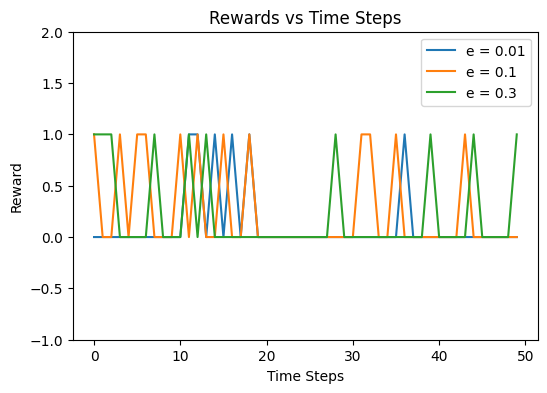

In [4]:
plt.figure(figsize=(6, 4))
for i, e in enumerate([0.01, 0.1, 0.3]):
    plt.plot(range(steps), rewards[:, 0, i], label=f"e = {e}")

plt.xlabel('Time Steps')
plt.ylabel('Reward')
plt.ylim(-1 , 2)
plt.title('Rewards vs Time Steps')
plt.legend(loc='upper right')
plt.show()

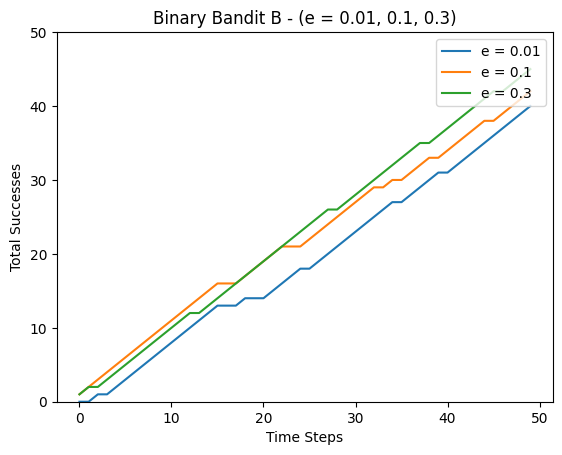

In [5]:
steps = 50
rewards = np.zeros((steps, 2, 3))
i = 0
total_value = np.zeros((steps, 3))

for e in [0.01, 0.1, 0.3]:
    rewards[:, :, i] = 0
    step = 0
    
    while step < steps:
        # exploration
        if np.random.rand() < e or step == 0:
            action = np.random.randint(2) + 1
            value = binary_bandit_b(action)
            total_value[step, i] = value
            if step > 0:
                total_value[step, i] += total_value[step - 1, i]
            rewards[step, :, i] = [value, action]
        else:
            # exploitation
            a1 = np.sum(rewards[:step, 0, i] == 1) if np.sum(rewards[:step, 1, i] == 1) else 0
            a2 = np.sum(rewards[:step, 0, i] == 1) if np.sum(rewards[:step, 1, i] == 2) else 0
            
            action = 1 if a2 > a1 else 2
            
            value = binary_bandit_b(action)
            total_value[step, i] = value + total_value[step - 1, i]
            rewards[step, :, i] = [value, action]
        
        step += 1
    
    i += 1

plt.plot(total_value[:, 0])
plt.plot(total_value[:, 1])
plt.plot(total_value[:, 2])
plt.ylim([0, 50])
plt.xlabel('Time Steps')
plt.ylabel('Total Successes')
plt.legend(['e = 0.01', 'e = 0.1', 'e = 0.3'], loc='upper right')
plt.title('Binary Bandit B - (e = 0.01, 0.1, 0.3)')
plt.show()

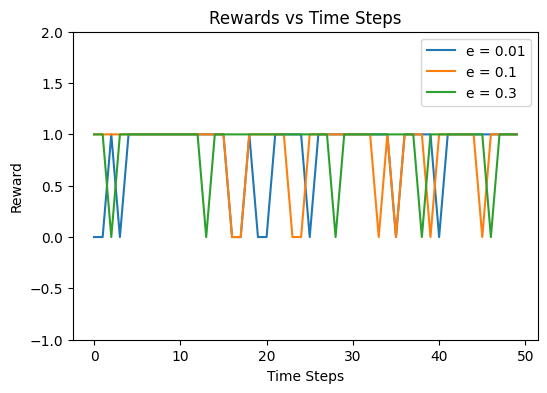

In [6]:
plt.figure(figsize=(6, 4))
for i, e in enumerate([0.01, 0.1, 0.3]):
    plt.plot(range(steps), rewards[:, 0, i], label=f"e = {e}")

plt.xlabel('Time Steps')
plt.ylabel('Reward')
plt.ylim(-1 , 2)
plt.title('Rewards vs Time Steps')
plt.legend(loc = "upper right")
plt.show()

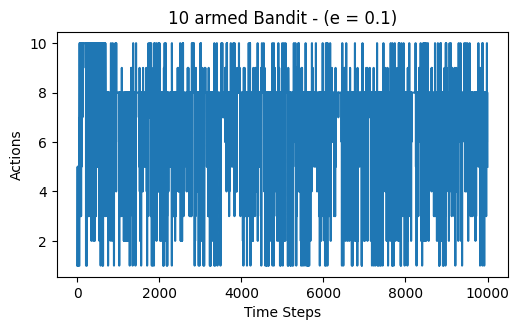

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def bandit(action):
    m = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.7, 0.45, 0.55] 
    return m[action - 1] + np.random.randn()

steps = 10000
rewards = np.zeros((steps, 2, 3))
total_value = np.zeros((steps, 3))
cnt_actions = np.zeros((10, 3))

for i, e in enumerate([0.01, 0.1, 0.3], start=1):
    total_value[:, i - 1] = 0
    rewards[:, :, i - 1] = 0
    cnt_actions[:, i - 1] = 0
    step = 1

    while step <= steps:
        # Exploration
        if np.random.rand() < e or step == 1:
            action = np.random.randint(1, 11)
            value = bandit(action)
            total_value[step - 1, i - 1] = value
            if step > 1:
                total_value[step - 1, i - 1] += total_value[step - 2, i - 1]
            rewards[step - 1, :, i - 1] = [value, action]

        # Exploitation
        else:
            actions = np.zeros((10, 2))
            for s in range(step - 1):
                actions[int(rewards[s, 1, i - 1]) - 1, 0] += rewards[s, 0, i - 1]
                actions[int(rewards[s, 1, i - 1]) - 1, 1] += 1

            action = np.argmax(np.divide(actions[:, 0], np.where(actions[:, 1] == 0, 1, actions[:, 1]))) + 1
            value = bandit(action)
            total_value[step - 1, i - 1] = value + total_value[step - 2, i - 1]
            rewards[step - 1, :, i - 1] = [value, action]
            cnt_actions[:, i - 1] = actions[:, 1]

        step += 1

# Plotting
plt.figure(figsize=(10, 6))

# Plot rewards vs time steps
plt.subplot(2, 2, 1)
plt.plot(rewards[:, 1, 1])
plt.xlabel('Time Steps')
plt.ylabel('Actions')
plt.title('10 armed Bandit - (e = 0.1)')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, '10 armed Bandit - (e = 0.1)')

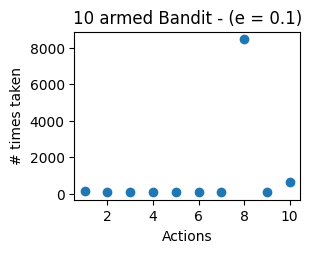

In [8]:
# Plot number of times actions taken
plt.subplot(2, 2, 2)
plt.scatter(range(1, 11), cnt_actions[:, 1])
plt.xlabel('Actions')
plt.ylabel('# times taken')
plt.title('10 armed Bandit - (e = 0.1)')

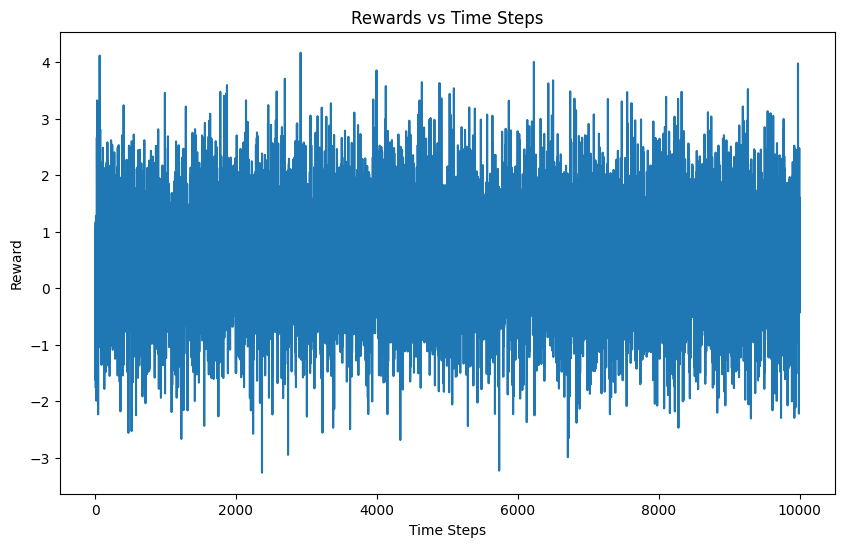

In [9]:
plt.figure(figsize=(10, 6))
for i, e in enumerate([0.1], start=1):
    plt.plot(rewards[:, 0, i - 1], label=f"e = {e}")

plt.xlabel('Time Steps')
plt.ylabel('Reward')
plt.title('Rewards vs Time Steps')
plt.show()

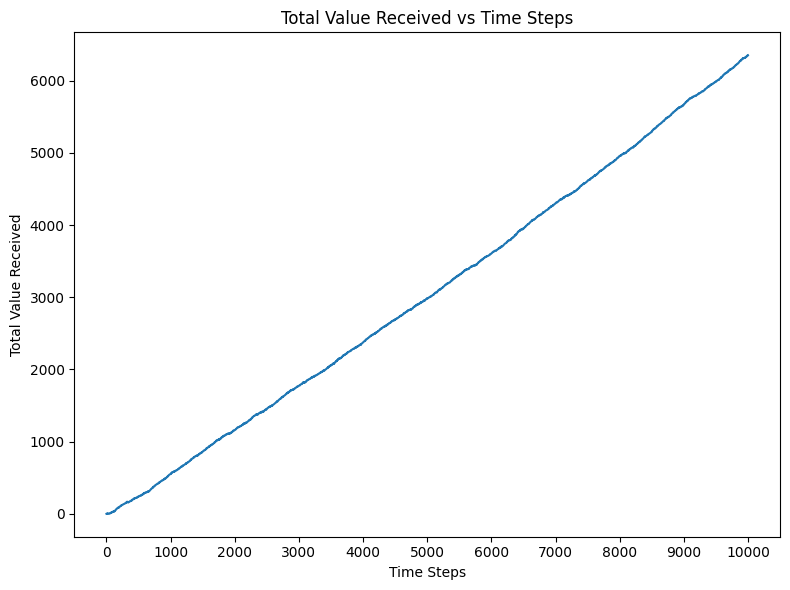

In [10]:
# Plot total value received vs time steps
plt.figure(figsize=(8, 6))
plt.plot(total_value[:, 1])
plt.xlabel('Time Steps')
plt.ylabel('Total Value Received')
plt.title('Total Value Received vs Time Steps')
plt.xticks(np.arange(0, steps + 1, 1000))  
plt.tight_layout()
plt.show()

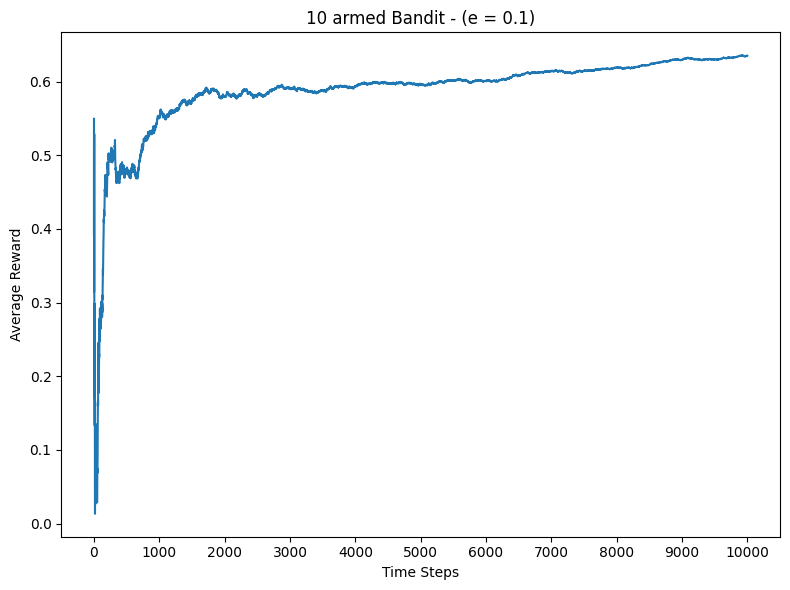

In [11]:
avg_reward = np.cumsum(rewards[:, 0, 1]) / np.arange(1, steps + 1)

# Plot average reward vs time steps
plt.figure(figsize=(8, 6))
plt.plot(avg_reward)
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.title('10 armed Bandit - (e = 0.1)')
plt.xticks(np.arange(0, steps + 1, 1000))  
plt.tight_layout()
plt.show()

In [13]:
import numpy as np

mean_rewards = np.zeros(10)

std_dev = 0.01

def bandit_nonstat(action):
    m = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.7, 0.45, 0.55] 
    return m[action - 1] + np.random.randn()

action = 2  
reward = bandit_nonstat(action)
print("Reward for action", action, ":", reward)

Reward for action 2 : 0.534204372259174
